# Using GeoJson to plot Vietnam map

Data source: [GADM database](https://gadm.org/download_country.html#google_vignette)

This is a tutorial on how to use GeoJson files to plot Vietnam specific map plot.

## 1. Setting things up

There are a few things we have to set up before plotting our maps.

### 1.1 Importing necessary libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geoplot as gplt
import geoplot.crs as gcrs

import random

### 1.2 Load our GeoJSON files

There are 3 files that all depicts Vietnam maps but in increasing complexity level.
- Level 1: Provinces/administrative city level.
- Level 2: Districs level.
- Level 3: Village level.

In [2]:
data_lv1 = gpd.read_file('gadm41_VNM_1.json')
data_lv2 = gpd.read_file('gadm41_VNM_2.json')
data_lv3 = gpd.read_file('gadm41_VNM_3.json')

### 1.3 Other ultilities

We will need to do some cleaning with the dataset as well. One of the task is to convert Vietnamese name to English, which essentially means removing all the diacritics used.

Code: [J2TEAM on Github](https://gist.github.com/J2TEAM/9992744f15187ba51d46aecab21fd469)

In [3]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(input_str):
	s = ''
	for c in input_str:
		if c in s1:
			s += s0[s1.index(c)]
		else:
			s += c
	return s

## 2. Understand and processing our data

Let's see how our data is structured.

In [4]:
# Level 1 complexity
print(data_lv1.columns)
data_lv1.head(3)

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,VNM.1_1,VNM,Vietnam,AnGiang,AnGiang,NA,Tỉnh,Province,NA,VN.AG,VN-44,"MULTIPOLYGON (((105.54860 10.42950, 105.54950 ..."
1,VNM.7_1,VNM,Vietnam,BàRịa-VũngTàu,BaRia-VungTau,NA,Tỉnh,Province,NA,VN.BV,NA,"MULTIPOLYGON (((107.09010 10.32400, 107.08890 ..."
2,VNM.3_1,VNM,Vietnam,BắcGiang,BacGiang,NA,Tỉnh,Province,NA,VN.BG,NA,"MULTIPOLYGON (((106.28380 21.13230, 106.27340 ..."


Columns that we will use:
- NAME_1: Name of province in Vietnamese.
- VARNAME_1: Name of privince in English.
- TYPE_1: Administrative level in Vietnamese.
- ENGTYPE_1: Administrative level in English.

---

For level 2 and 3:

In [5]:
# Level 2 complexity
print(data_lv2['NAME_1'].unique())
data_lv2.head(3)

['AnGiang' 'BàRịa-VũngTàu' 'BắcGiang' 'BắcKạn' 'BạcLiêu' 'BắcNinh'
 'BếnTre' 'BìnhĐịnh' 'BìnhDương' 'BìnhPhước' 'BìnhThuận' 'CàMau' 'CầnThơ'
 'CaoBằng' 'ĐàNẵng' 'ĐắkLắk' 'ĐắkNông' 'ĐiệnBiên' 'ĐồngNai' 'ĐồngTháp'
 'GiaLai' 'HàGiang' 'HàNam' 'HàNội' 'HàTĩnh' 'HảiDương' 'HảiPhòng'
 'HậuGiang' 'HồChíMinh' 'HoàBình' 'HưngYên' 'KhánhHòa' 'KiênGiang'
 'KonTum' 'LaiChâu' 'LâmĐồng' 'LạngSơn' 'LàoCai' 'LongAn' 'NamĐịnh'
 'NghệAn' 'NinhBình' 'NinhThuận' 'PhúThọ' 'PhúYên' 'QuảngBình' 'QuảngNam'
 'QuảngNgãi' 'QuảngNinh' 'QuảngTrị' 'SócTrăng' 'SơnLa' 'TâyNinh'
 'TháiBình' 'TháiNguyên' 'ThanhHóa' 'ThừaThiênHuế' 'TiềnGiang' 'TràVinh'
 'TuyênQuang' 'VĩnhLong' 'VĩnhPhúc' 'YênBái']


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,VNM.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,AnPhú,AnPhu,NA,Huyện,District,NA,VN.TT.AL,"MULTIPOLYGON (((105.15660 10.82870, 105.16010 ..."
1,VNM.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,ChâuĐốc,ChauDoc,NA,Thànhphố,City,NA,VN.KG.AB,"MULTIPOLYGON (((105.10500 10.63830, 105.08150 ..."
2,VNM.1.4_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,ChâuPhú,ChauPhu,NA,Huyện,District,NA,VN.HP.AD,"MULTIPOLYGON (((105.18790 10.46030, 105.17980 ..."


In [6]:
# Level 3 complexity
print(data_lv3.columns)
data_lv3.head(3)

Index(['GID_3', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2',
       'NAME_2', 'NL_NAME_2', 'NAME_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3',
       'ENGTYPE_3', 'CC_3', 'HASC_3', 'geometry'],
      dtype='object')


,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,VNM.1.1.1_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,AnPhú,AnPhu,NA,Thịtrấn,Townlet,NA,NA,"MULTIPOLYGON (((105.10720 10.77730, 105.09440 ..."
1,VNM.1.1.2_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,ĐaPhước,DaPhuoc,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.09440 10.76980, 105.10720 ..."
2,VNM.1.1.3_1,VNM,Vietnam,VNM.1_1,AnGiang,NA,VNM.1.1_1,AnPhú,NA,KhánhAn,KhanhAn,NA,Xã,Ward,NA,NA,"MULTIPOLYGON (((105.11300 10.96200, 105.11660 ..."


Noticed that province name of level 2 and level 3, along with district name in level 3 doesn't have corresponding English name. Let's transform the Vietnamese name into English columns.

In [7]:
data_lv2['NL_NAME_1'] = data_lv2['NAME_1'].transform(lambda x: remove_accents(x))
data_lv3['NL_NAME_1'] = data_lv3['NAME_1'].transform(lambda x: remove_accents(x))
data_lv3['NL_NAME_2'] = data_lv3['NAME_2'].transform(lambda x: remove_accents(x))

Overall, these are the columns we will work on in level 2 and 3:
- NAME_1
- NL_NAME_1
- NAME_2
- VARNAME_2
- NL_NAME_2

With level 3:
- NAME_3
- VARNAME_3

----

In [13]:
# Colepleth test with 2019 national exam data
# Data source: https://www.kaggle.com/datasets/tdbui1209/vietnam-national-hs-graduation-examination-2021
# Geographic data (province) extracted by the first 2 digit of student ID - which is provincial ID

exam2021 = pd.read_csv('2021-national-exam-result.csv', index_col=0)
exam2021 = pd.merge(exam2021, data_lv1, left_on='province', right_on='VARNAME_1')
print(exam2021.columns)

Index(['id_examinee', 'math', 'physics', 'chemistry', 'biology', 'history',
       'geography', 'literature', 'civic_education', 'english', 'russian',
       'french', 'chinese', 'german', 'japanese', 'SBD_province', 'province',
       'GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


In [35]:
# Create counting group for all province
exam2021_cnt = exam2021.groupby(['province', 'geometry']).count()

In [36]:
def draw_choropleth(data, subject, title):
    ax = gplt.choropleth(
        data, hue=subject, projection=gcrs.AlbersEqualArea(),
        edgecolor='black', linewidth=1,
        cmap='Greens', legend=True,
        scheme='FisherJenks',
        figsize=(12, 16))

    ax.set_title(title)

def makeGeopandas(data):
    res = gpd.GeoDataFrame(data,crs="EPSG:4326", geometry='geometry')
    return res

def calculateRatio(subject):
    good_cnt = exam2021[exam2021[subject] >= 8].groupby(['province', 'geometry']).count()
    return makeGeopandas((good_cnt / exam2021_cnt).reset_index())    
    
def calculateDescriptiveStatistic(ds):
    exam2019_by_province_median = exam2021.groupby(['province', 'geometry'])[['math', 'physics', 'chemistry', 'biology', 'history',
       'geography', 'literature', 'civic_education', 'english', 'russian',
       'french', 'chinese', 'german', 'japanese']].agg(ds)
    exam2019_by_province_median.reset_index(inplace=True)

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


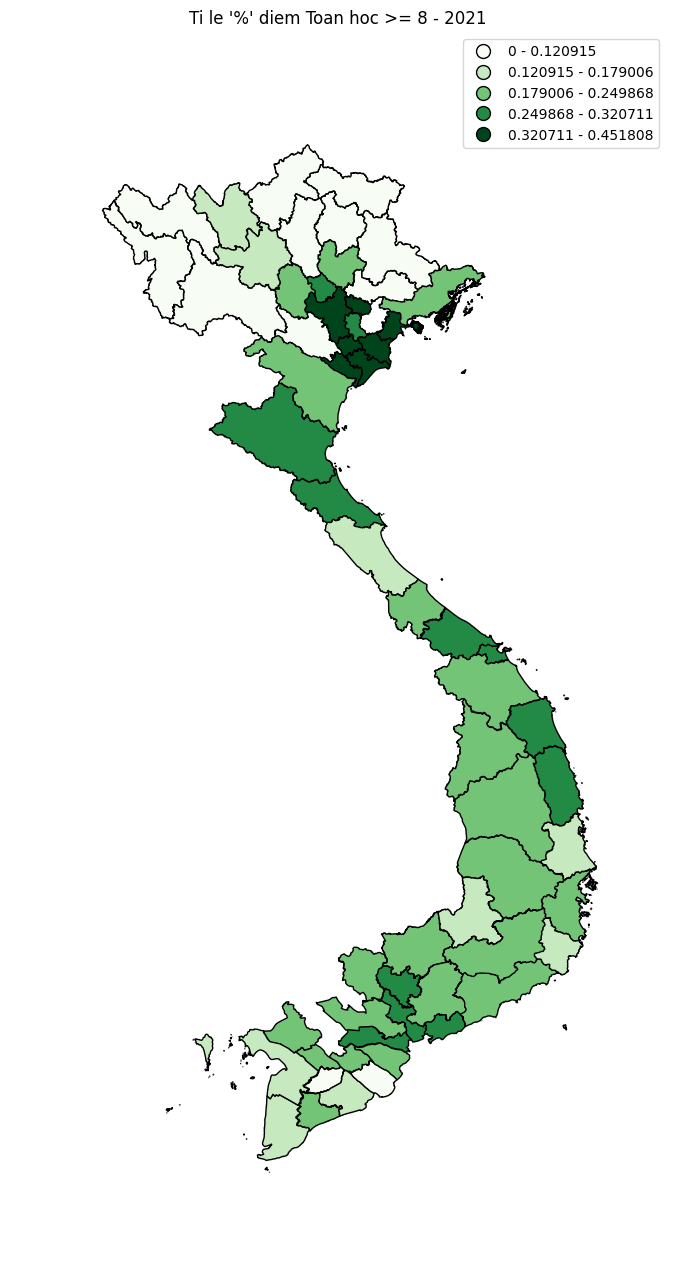

In [40]:
draw_choropleth(makeGeopandas((calculateRatio('math')).reset_index()), "math", "Ti le '%' diem Toan hoc >= 8 - 2021")

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


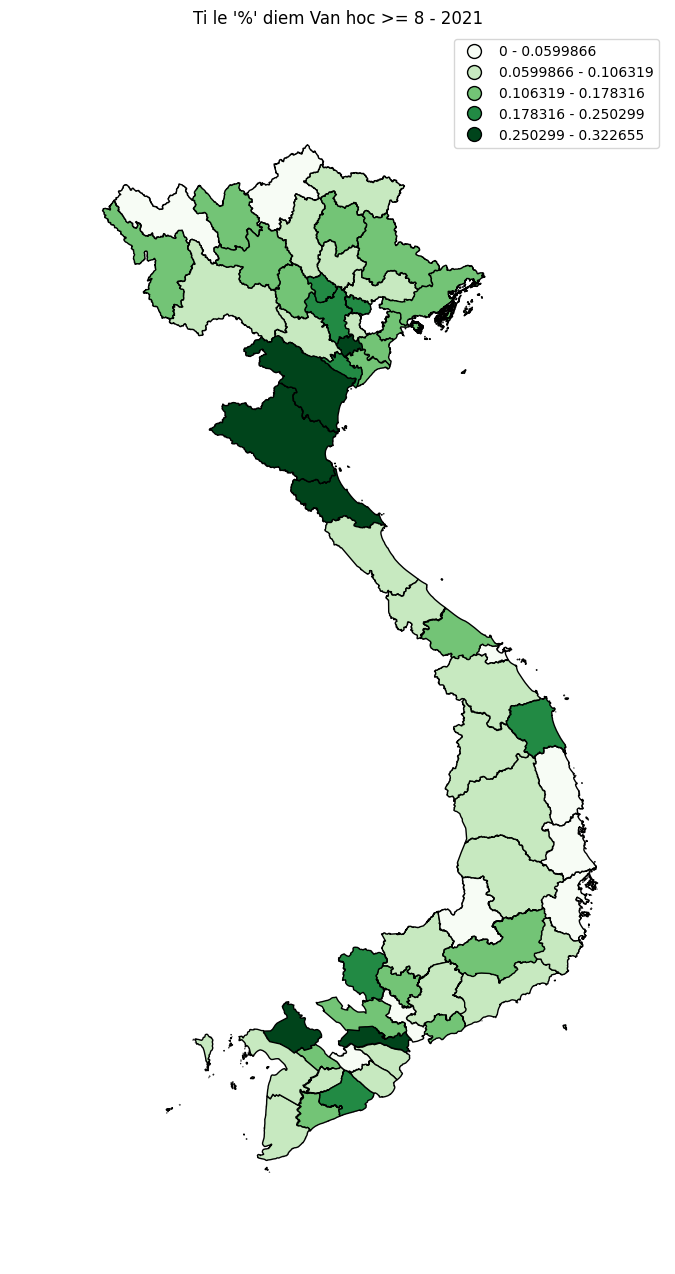

In [41]:
draw_choropleth(makeGeopandas((calculateRatio('literature')).reset_index()), "literature", "Ti le '%' diem Van hoc >= 8 - 2021")

c:\Users\nk\anaconda3\envs\min_ds-env\Lib\site-packages\geoplot\geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


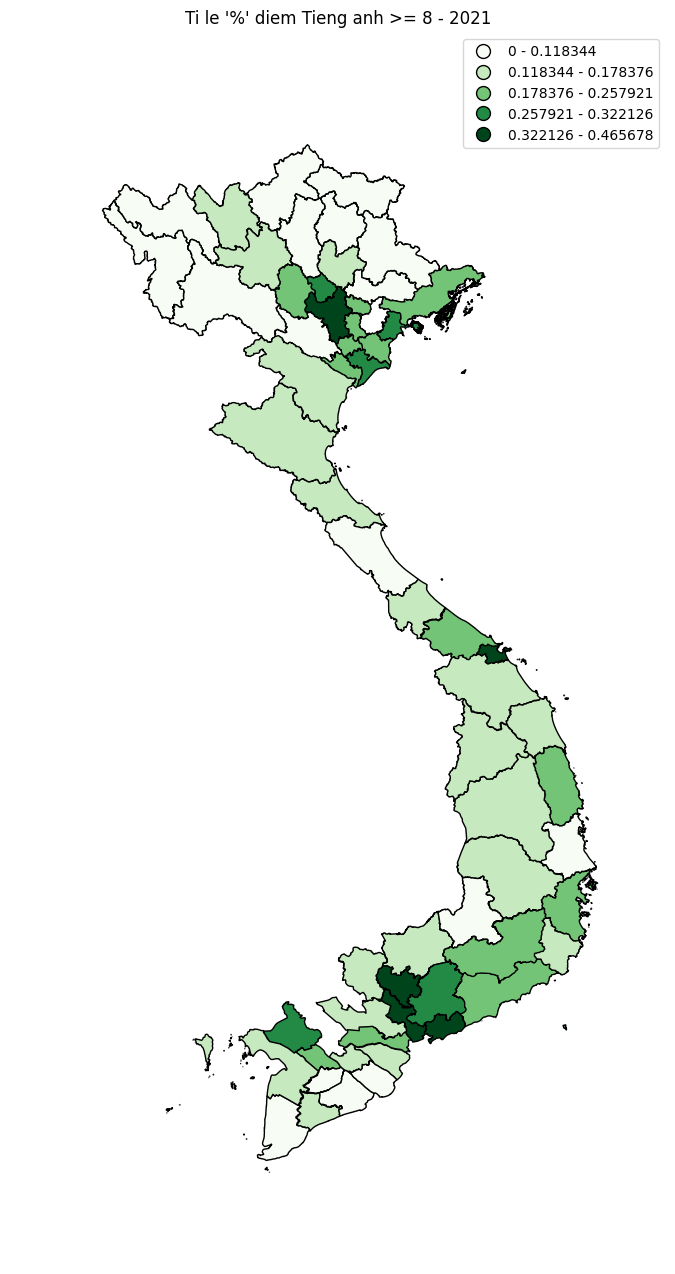

In [42]:
draw_choropleth(makeGeopandas((calculateRatio('english')).reset_index()), "english", "Ti le '%' diem Tieng anh >= 8 - 2021")
